![image](https://user-images.githubusercontent.com/57321948/196933065-4b16c235-f3b9-4391-9cfe-4affcec87c35.png)

# Submitted by: Mohammad Wasiq

## Email: `gl0427@myamu.ac.in`

# Placement Python Assignment 8

Question 8 -

Using the data from Question 5, write code the analyze the data and answer the following questions Note -

1. Draw plots to demonstrate the analysis for the following questions and better visualizations

2. Write code comments wherever required for code understanding

Insights to be drawn -

● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.

● Get all the episode names, whose average rating is more than 8 for every season


● Get all the episode names that aired before May 2019

● Get the episode name from each season with the highest and lowest rating

● Get the summary for the most popular ( ratings ) episode in every season

Ans:

In [1]:
import numpy as np
import pandas as pd
import ast

In [2]:
df = pd.read_csv("Output.csv")

In [3]:
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,{'average': 7.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard suspects that someone is sabotaging...,{'self': {'href': 'https://api.tvmaze.com/epis...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,{'average': 7.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,<p>While Dolores joins William and Logan on th...,{'self': {'href': 'https://api.tvmaze.com/epis...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Dolores takes the first step on her path of...,{'self': {'href': 'https://api.tvmaze.com/epis...


In [4]:
df.shape

(36, 14)

In [5]:
df["rating"] = df["rating"].apply(lambda x : x.split("}")[0].split(":")[1])

In [6]:
df1 = df.copy()

In [7]:
# Get all the episode names, whose average rating is more than 8 for every season
df1["rate_TF"] = df["rating"].astype(float) > 8.0
df1.loc[df1["rate_TF"] == True]["name"]

6                 Trompe L'Oeil
8     The Well-Tempered Clavier
9            The Bicameral Mind
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

In [8]:
# Get all the episode names that aired before May 2019
df1["air_year"] = df1["airdate"].apply(lambda x : int(x.split("-")[0]))
df1["air_year_TF"] = df1["air_year"] < 2019
df1.loc[df1["air_year_TF"] == True]["name"]

0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

In [9]:
# Get the episode name from each season with the highest and lowest rating
df["rating"] = df["rating"].astype(float)

In [10]:
mx = df["rating"].idxmax()
mi = df["rating"].idxmin()
df.loc[mx]["name"], df.loc[mi]["name"]

('The Bicameral Mind', 'The Auguries')

In [11]:
# Get the summary for the most popular ( ratings ) episode in every season
df1["pop"] = pd.Series(list(dict(df.groupby(["name"])["rating"].sum() > 8).values()))

In [12]:
df1["pop"]

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22     True
23    False
24    False
25     True
26    False
27    False
28     True
29    False
30    False
31     True
32     True
33    False
34    False
35    False
Name: pop, dtype: bool

In [13]:
df.loc[df1["pop"] == True]["name"]

11                 Reunion
22    The Absence of Field
25             Decoherence
28            The Auguries
31         Generation Loss
32                Zhuangzi
Name: name, dtype: object

In [14]:
# Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

df.groupby(["name", "season"])["rating"].sum()

name                       season
Akane No Mai               2         7.6
Années Folles              4         7.6
Chestnut                   1         7.7
Contrapasso                1         8.0
Crisis Theory              3         7.7
Decoherence                3         7.5
Dissonance Theory          1         7.9
Fidelity                   4         7.5
Generation Loss            4         7.7
Genre                      3         7.9
Journey Into Night         2         7.8
Kiksuya                    2         8.7
Les Écorchés               2         7.9
Metanoia                   4         7.7
Parce Domine               3         8.0
Passed Pawn                3         7.5
Phase Space                2         7.7
Que Será, Será             4         7.5
Reunion                    2         7.7
The Absence of Field       3         7.8
The Adversary              1         8.0
The Auguries               4         7.1
The Bicameral Mind         1         8.7
The Mother of Exiles   

<AxesSubplot:xlabel='name,season'>

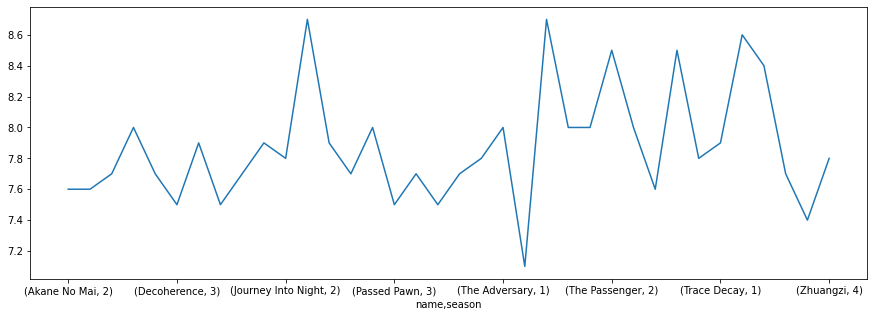

In [15]:
df.groupby(["name", "season"])["rating"].sum().plot(figsize=(15, 5))